In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


[Text(0.5, 1.0, 'Median value of owner-occupied homes')]

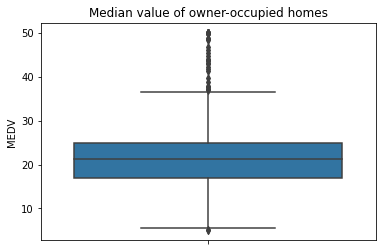

In [3]:
## For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(y = 'MEDV', data = boston_df).set(title = 'Median value of owner-occupied homes')

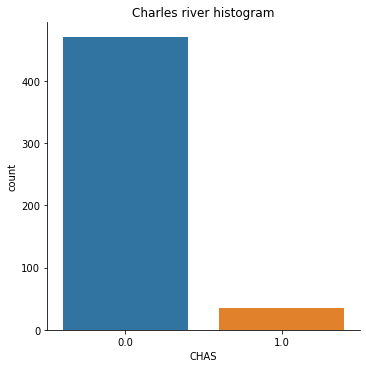

In [4]:
## Provide a  histogram for the Charles river variable
sns.catplot(x = 'CHAS', kind = 'count', data = boston_df).set(title = 'Charles river histogram')

[Text(0.5, 1.0, 'MEDV vs. AGE_GROUP')]

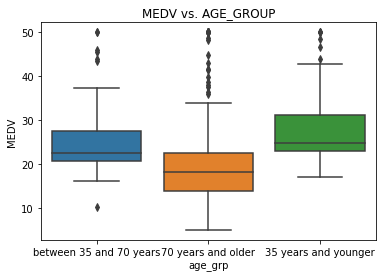

In [18]:
## Provide a boxplot for the MEDV variable vs the AGE variable. 
                                   # (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'age_grp'] = '35 years and younger'  
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_grp'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_grp'] = '70 years and older'

sns.boxplot(x = 'age_grp', y = 'MEDV', data = boston_df).set(title = 'MEDV vs. AGE_GROUP')

[Text(0.5, 1.0, 'Nitric acid conc. vs Proportion of non-retail business acres')]

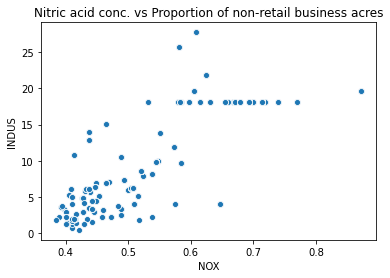

In [6]:
## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
                                                                                                                 # What can you say about the relationship?
    
sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df).set(title = 'Nitric acid conc. vs Proportion of non-retail business acres')    

[Text(0.5, 1.0, 'Pupil to teacher ratio histogram')]

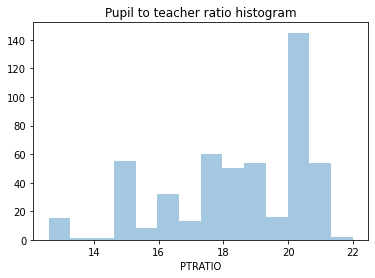

In [7]:
## Create a histogram for the pupil to teacher ratio variable
sns.distplot(boston_df['PTRATIO'], kde = False).set(title = 'Pupil to teacher ratio histogram')

In [15]:
## Null hypothesis : There is no significant difference in median value of houses, bounded by the Charles river or not
## Alternate hypothesis : There is a significant difference in median value of houses, bounded by the Charles river or not

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'], boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = True)

# As the pvalue < 0.05, we reject the null hypothesis, thereby concluding that there is a significant difference,
                                                                                # in median value of houses, bounded by the Charles river or not.

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

In [21]:
## Null hypothesis : The three population means are equal i.e.,no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.
## Alternate hypothesis : At least one of the means differ.

thirtyFive_less_age = boston_df[boston_df['age_grp'] == '35 years and younger']['MEDV']
thirtyFive_to_seventy_age = boston_df[boston_df['age_grp'] == 'between 35 and 70 years']['MEDV']
seventy_older_age = boston_df[boston_df['age_grp'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyFive_less_age, thirtyFive_to_seventy_age, seventy_older_age)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# As the pvalue < 0.05, we reject the null hypothesis, as there is significant evidence that at least one of the means differ.

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [22]:
## Null hypothesis : There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
## Alternate hypothesis : There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# As the pvalue < 0.05, we reject the null hypothesis, thereby concluding that :
                                                   # there exists a relationship between Nitric acid concentrations and proportion of non-retail business acres per town.

(0.7636514469209154, 7.913361061236894e-98)

In [25]:
## Null hypothesis : There is no impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.
## Alternate hypothesis : There is an impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.

X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

# As the pvalue < 0.05, we reject the null hypothesis, thereby concluding that :
                                     # There is an impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.
# R-squared = 0.062 , therefore correlation coefficient is 0.249 suggesting weak correlation.
# Hence, an additional weighted distance to the five Boston employment centres will have a weak impact on the median value of owner occupied homes.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 26 Jul 2021   Prob (F-statistic):           1.21e-08
Time:                        18:16:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""